# Outline<a class="anchor" id="outline"></a>

1. [Problem Introduction & Motivation](#intro)
2. [Import Package Dependencies](#package)
3. [Data Preparation](#dataprep)<br>
    [(1) Checking for duplicate records and deleting them if they exist](#duplicate)<br>
    [(2) Outlier detection and treatmen](#outlier)<br>
    [(3) Handling of missing values](#null)<br>
    [(4) Conversion of categorical variables](#cat_variable)<br>
    [(5) Feature Selection: exploration and identification](#explore)<br>
    [(6) Supporting data visualizations](#sup_data_visualize)<br>
    [(7) Train/Test Split](#split)
4. [Modeling: Linear Regression](#model)<br>
    [(1) Simple Regression Model #1](#simple_1)<br>
    [(2) Simple Regression Model #2](#simple_2)<br>
    [(3) Forward Selection](#forward)<br>
    [(4) Backward Selection](#backward)<br>
    [(5) Final Report](#report)
5. [Conclusion](#deploy)<br>
    [(1) Are you satisfied with your final model’s performance?  Why or why not?](#Q1)<br>
    [(2) What do you propose for next steps?](#Q2)<br>
    [(3) What would you do differently if you could?](#Q3)<br>
    [(4) Based on your findings – what would you want to communicate to business leadership in this industry?](#Q4)<br>



------

# Problem Introduction & Motivation<a class="anchor" id="intro"></a>
[Go to Top](#outline)

### What is the problem? 
I want to predict MSRP (Manufacturer's Suggested Retail Price) by analying several factors.
These factors include: Year, Engine Fuel Type, Engine HP, etc..
I will analyze the influence and weight of different factors to the MSRP prediction.

### Who might be interested in this problem and why?
The prediction result may be interesing to marketing departments and R&D department of the automobile manufactures.<br>
Because marketing department can use the prediction as a new pricing strategy and R&D department can use important features which influence MSRP mostly to distinguish different classes of cars.


# Import Package Dependencies<a class="anchor" id="package"></a>
[Go to Top](#outline)

In [2]:
import csv
import pickle         
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from bioinfokit.analys import stat
from bioinfokit import visuz
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score

# Data Preparation<a class="anchor" id="dataprep"></a>
[Go to Top](#outline)

## (1) Checking for duplicate records and deleting them if they exist<a class="anchor" id="duplicate">
> **Step 1:** Read CSV file and check the dataframe<br>
    
> **Step 2:** Check the duplicated data in the dataframe<br>
    
> **Step 3:** Delete duplicate rows from dataframe

### Step 1: Read CSV file and check the dataframe

In [3]:
file_path = 'car_pricing_data.csv'

# Open and read the CSV file
df = pd.read_csv(file_path)

In [4]:
df.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info() # 11914 rows in raw data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Step 2: Check the duplicated data in the dataframe

In [6]:
# Use the 'duplicated()' method to check for duplicates
duplicates = df.duplicated()

# Get the duplicated rows
duplicate_rows = df[duplicates]

# Print or further process the duplicate rows as needed
print(f"There are {len(duplicate_rows)} rows of duplicated data") 
print("---")
print(duplicate_rows)

There are 715 rows of duplicated data
---
         Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \


### Step 3: Delete duplicate rows from dataframe

In [7]:
df = df.drop_duplicates()

In [8]:
df.info() # after deletion, there are 11199 data remain

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

## (2) Outlier detection and treatment<a class="anchor" id="outlier">

In [9]:
target = df["MSRP"]

# Calculate the IQR (Interquartile Range)
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1

# Define a lower bound and an upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only non-outlier rows
df = df[(target >= lower_bound) & (target <= upper_bound)]

In [10]:
df.info() # after deleting outliers, there are only 10239 rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10239 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10239 non-null  object 
 1   Model              10239 non-null  object 
 2   Year               10239 non-null  int64  
 3   Engine Fuel Type   10236 non-null  object 
 4   Engine HP          10180 non-null  float64
 5   Engine Cylinders   10209 non-null  float64
 6   Transmission Type  10239 non-null  object 
 7   Driven_Wheels      10239 non-null  object 
 8   Number of Doors    10236 non-null  float64
 9   Market Category    6863 non-null   object 
 10  Vehicle Size       10239 non-null  object 
 11  Vehicle Style      10239 non-null  object 
 12  highway MPG        10239 non-null  int64  
 13  city mpg           10239 non-null  int64  
 14  Popularity         10239 non-null  int64  
 15  MSRP               10239 non-null  int64  
dtypes: float64(3), int64(5

## (3) Handling of missing values<a class="anchor" id="null">
> **Categorical Data:** Replace null into "N/A" as a new category
    
> **Numeric Data:** Replace numeric null into median of the column

In [11]:
# Replace categorical null into "N/A" as a new category
df['Engine Fuel Type'].fillna('N/A', inplace=True)
df['Market Category'].fillna('N/A', inplace=True)

# Replace numeric null into median of the column
numeric = ['Engine HP', 'Engine Cylinders', 'Number of Doors']
for i in numeric:
    median = df[i].median()
    df[i].fillna(median, inplace=True)

In [12]:
df.info() # still have 10239 rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10239 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10239 non-null  object 
 1   Model              10239 non-null  object 
 2   Year               10239 non-null  int64  
 3   Engine Fuel Type   10239 non-null  object 
 4   Engine HP          10239 non-null  float64
 5   Engine Cylinders   10239 non-null  float64
 6   Transmission Type  10239 non-null  object 
 7   Driven_Wheels      10239 non-null  object 
 8   Number of Doors    10239 non-null  float64
 9   Market Category    10239 non-null  object 
 10  Vehicle Size       10239 non-null  object 
 11  Vehicle Style      10239 non-null  object 
 12  highway MPG        10239 non-null  int64  
 13  city mpg           10239 non-null  int64  
 14  Popularity         10239 non-null  int64  
 15  MSRP               10239 non-null  int64  
dtypes: float64(3), int64(5

## (4) Conversion of categorical variables<a class="anchor" id="cat_variable">

In [13]:
# use LabelExcoder to converse categorical variables
lb = LabelEncoder()

df['Make'] = lb.fit_transform(df['Make'])
df['Model'] = lb.fit_transform(df['Model'])
df['Engine Fuel Type'] = lb.fit_transform(df['Engine Fuel Type'])
df['Transmission Type'] = lb.fit_transform(df['Transmission Type'])
df['Driven_Wheels'] = lb.fit_transform(df['Driven_Wheels'])
df['Market Category'] = lb.fit_transform(df['Market Category'])
df['Vehicle Size'] = lb.fit_transform(df['Vehicle Size'])
df['Vehicle Style'] = lb.fit_transform(df['Vehicle Style'])

In [14]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,3,1,2011,9,335.0,6.0,3,3,2.0,27,0,8,26,19,3916,46135
1,3,0,2011,9,300.0,6.0,3,3,2.0,55,0,6,28,19,3916,40650
2,3,0,2011,9,300.0,6.0,3,3,2.0,52,0,8,28,20,3916,36350
3,3,0,2011,9,230.0,6.0,3,3,2.0,55,0,8,28,18,3916,29450
4,3,0,2011,9,230.0,6.0,3,3,2.0,51,0,6,28,18,3916,34500


## (5) Feature Selection: exploration and identification<a class="anchor" id="explore">

In [15]:
# Use "corr()" to calculate the correlation coefficient between every columns and 'MSRP'
correlations = df.corr()['MSRP']
print(correlations)

Make                -0.170697
Model                0.063375
Year                 0.668997
Engine Fuel Type    -0.299076
Engine HP            0.730535
Engine Cylinders     0.309897
Transmission Type   -0.370147
Driven_Wheels       -0.191722
Number of Doors      0.184154
Market Category     -0.218622
Vehicle Size         0.263604
Vehicle Style       -0.049546
highway MPG         -0.023663
city mpg            -0.046421
Popularity           0.041139
MSRP                 1.000000
Name: MSRP, dtype: float64


## (6) Supporting data visualizations<a class="anchor" id="sup_data_visualize">
> **Scatter Plot:** To observe the relationship between every columns and "MSRP"
    
> **Boxplot:** To check that there is no outlier in 'MSRP' anymore and observe the distribution of other columns
    
> **Run Chart:** To observe how the mean of 'MSRP' changed over year

In [16]:
columns = df.columns # output is a list filled with column name

### Scatter Plot

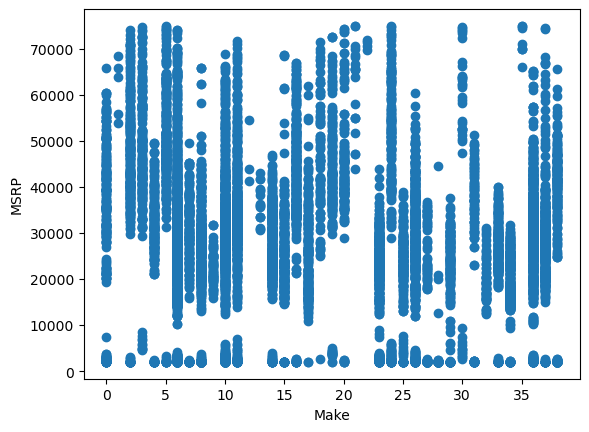

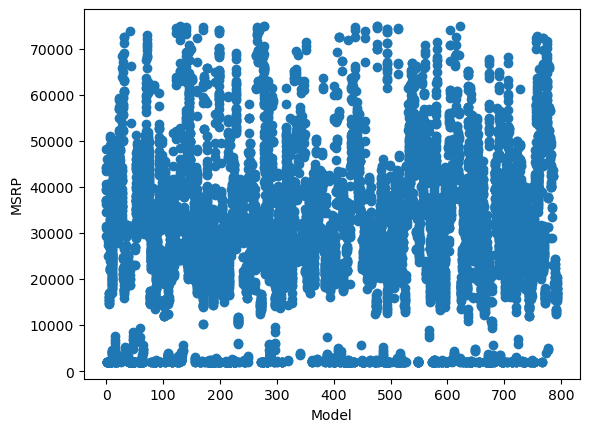

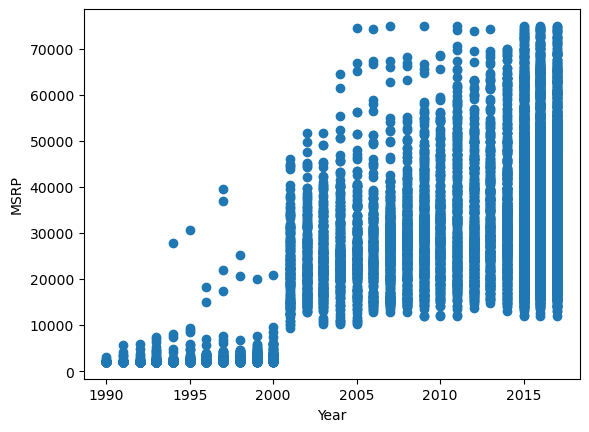

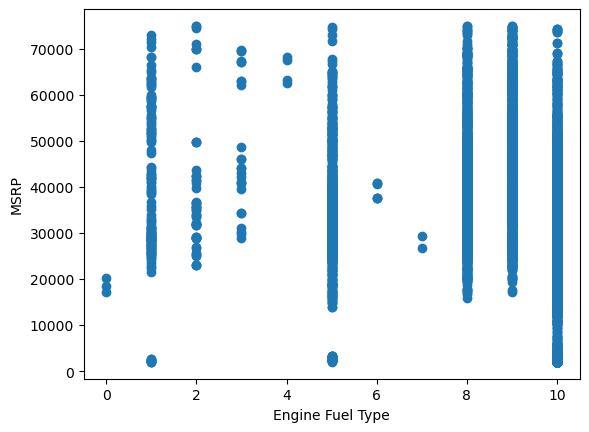

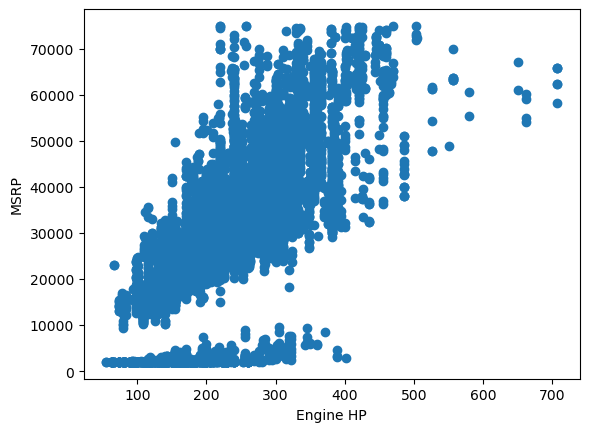

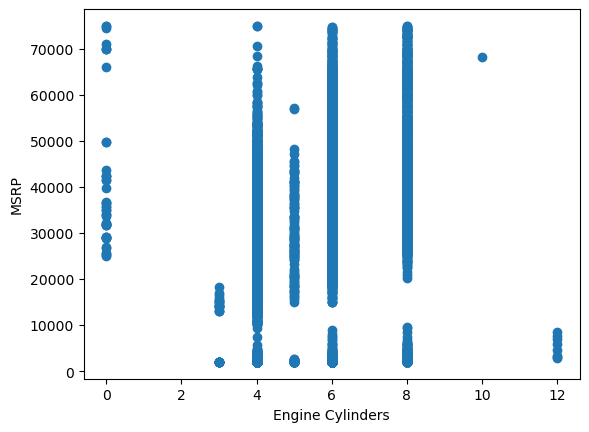

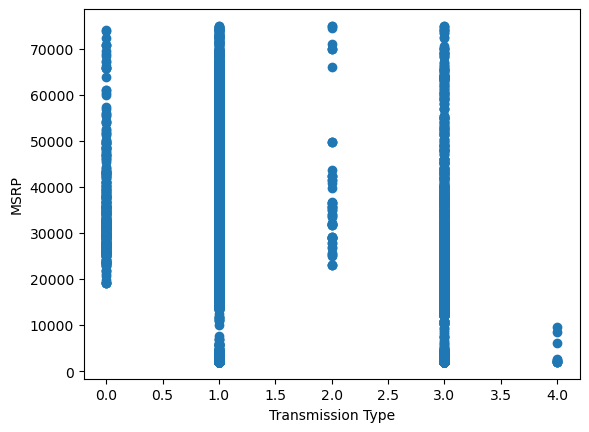

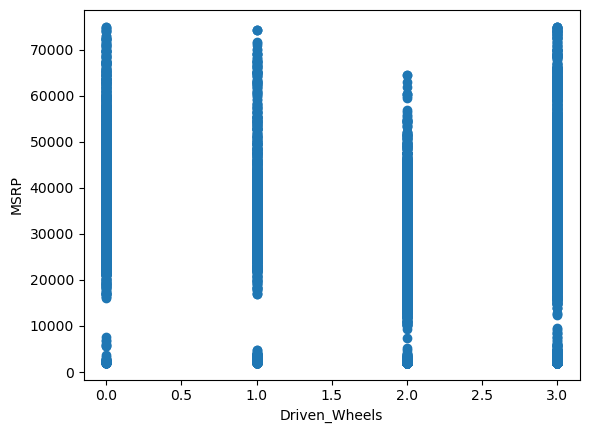

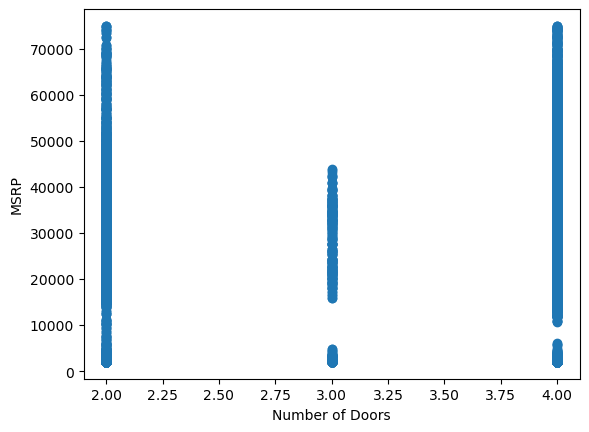

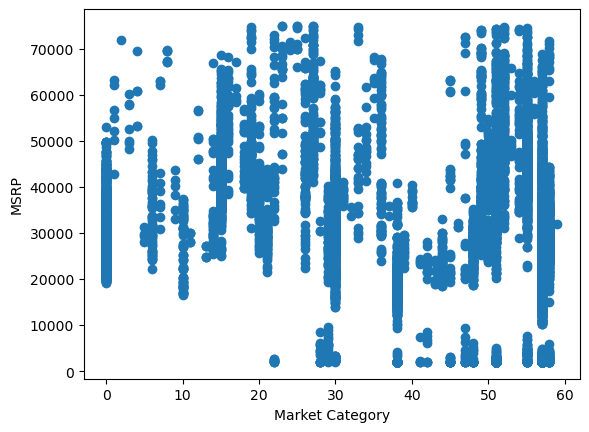

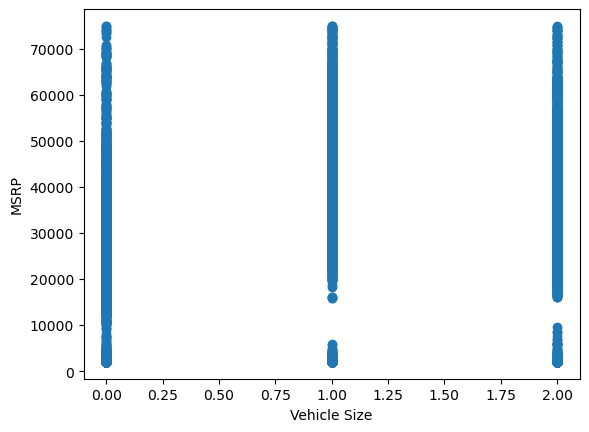

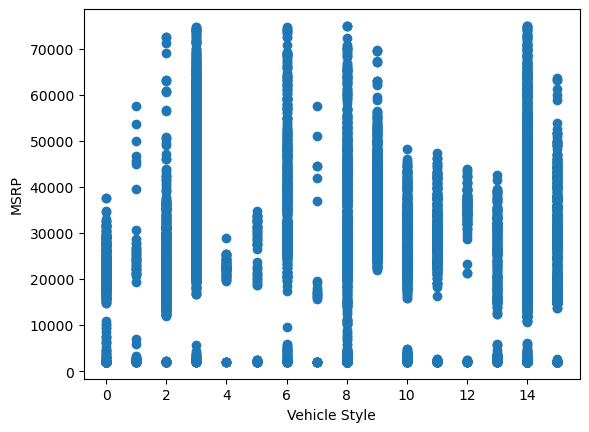

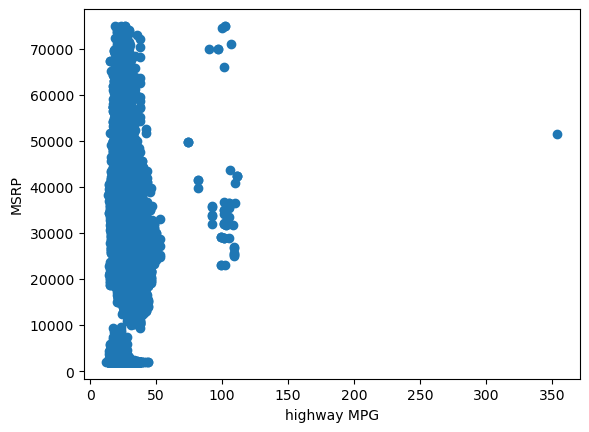

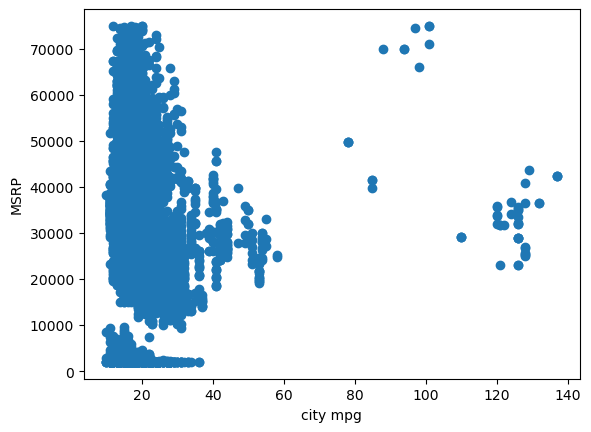

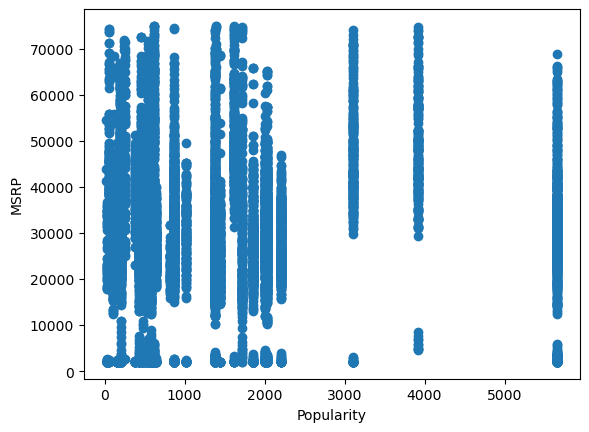

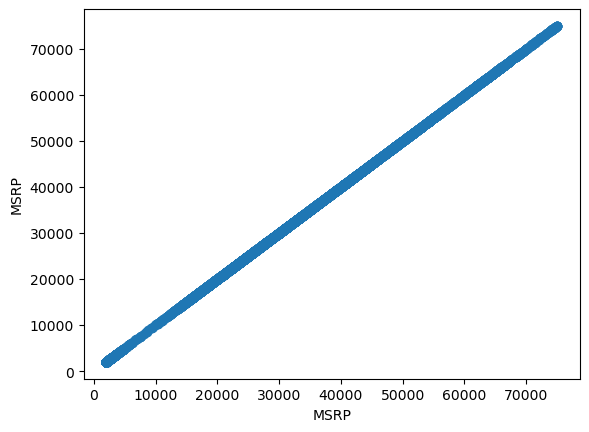

In [17]:
# Scatter Plot 
for i in columns:
    plt.scatter(df[i], df['MSRP'])
    plt.xlabel(i)
    plt.ylabel('MSRP')
    plt.show()
# Reason: To observe the relationship between every columns and "MSRP"

### Boxplot

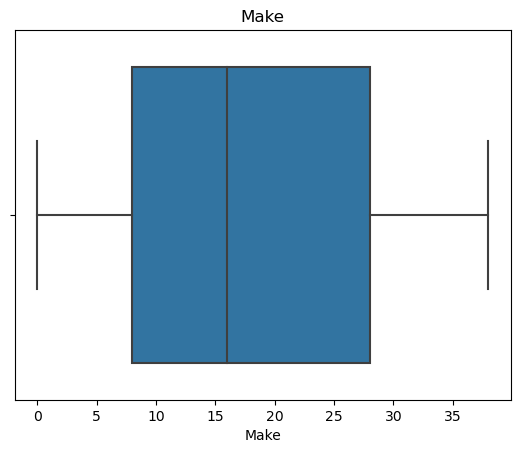

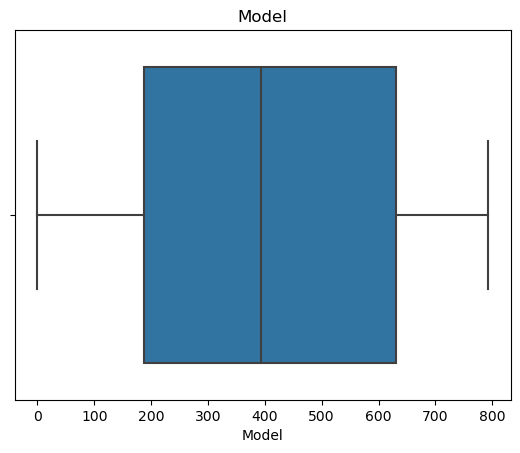

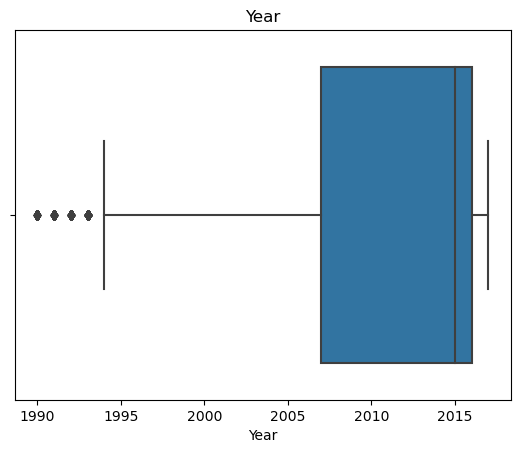

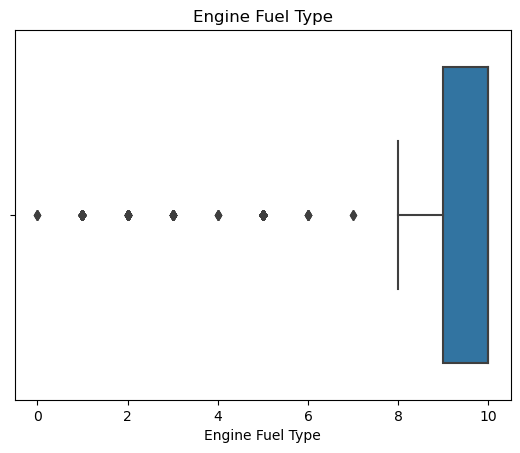

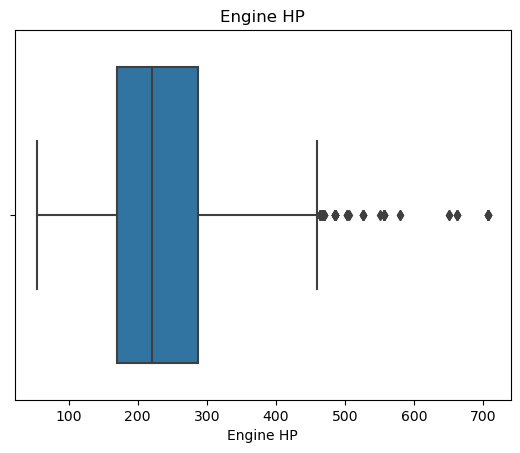

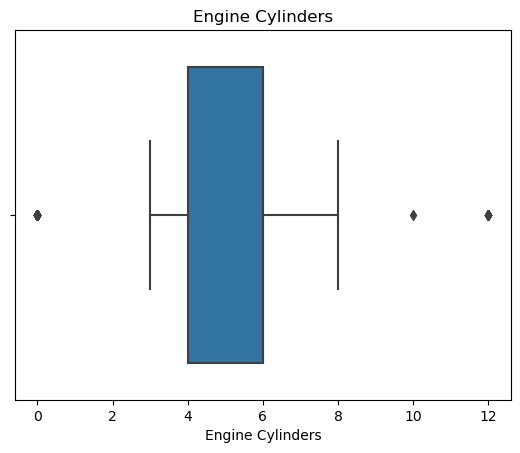

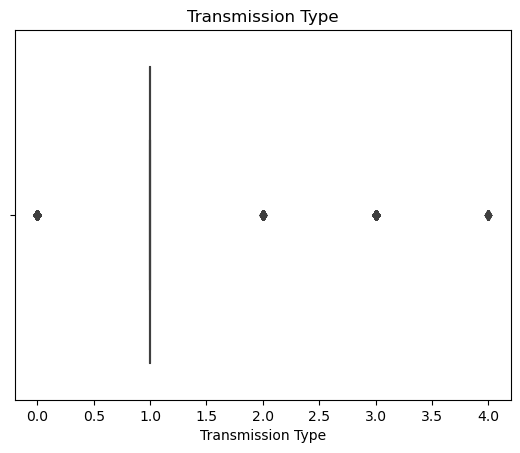

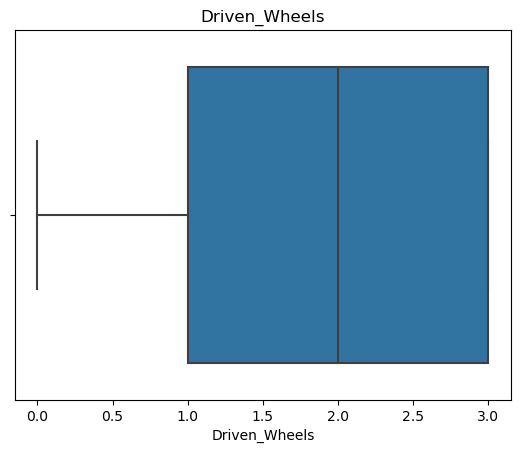

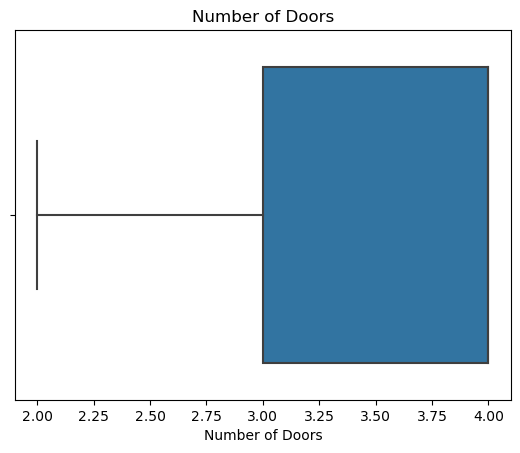

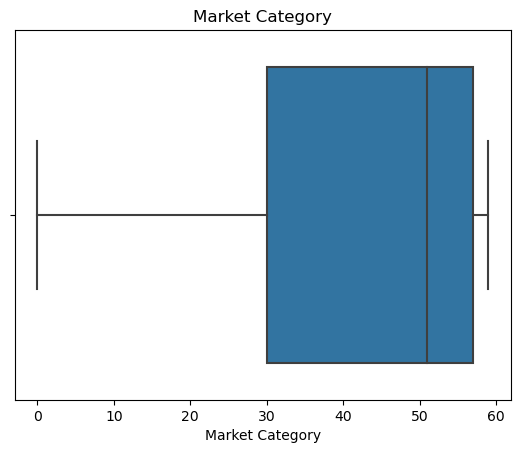

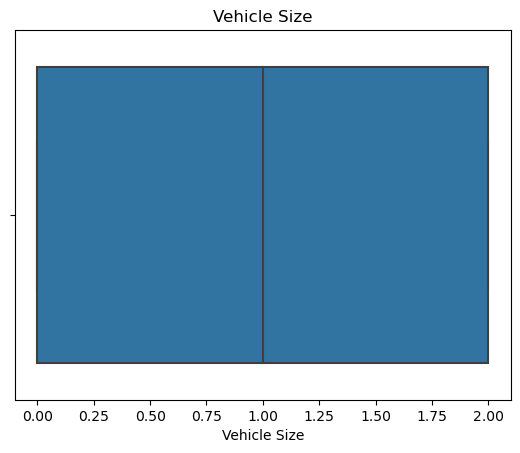

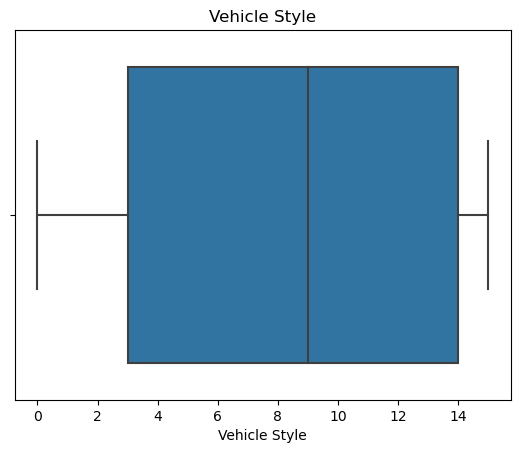

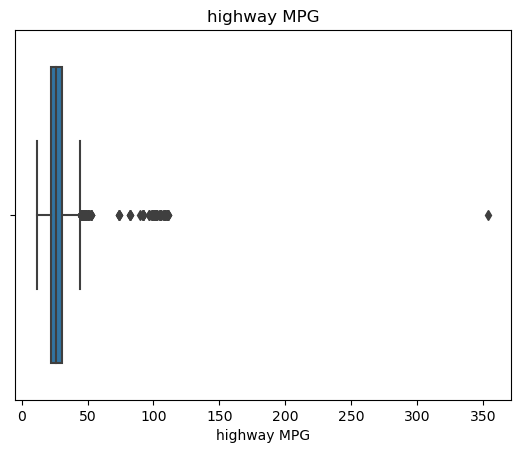

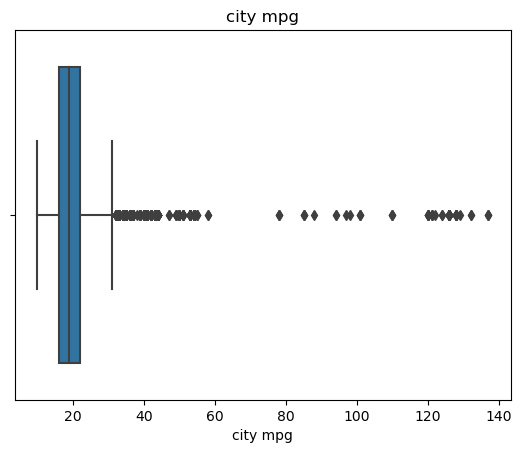

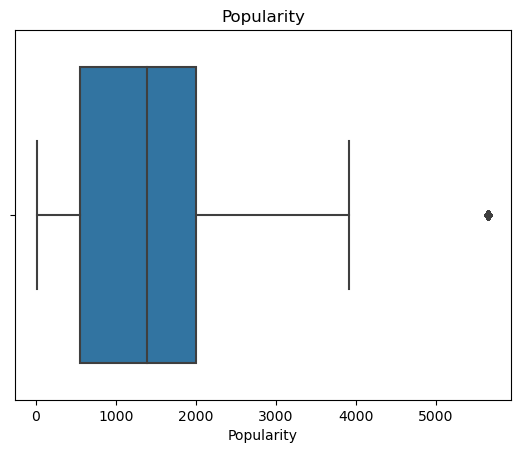

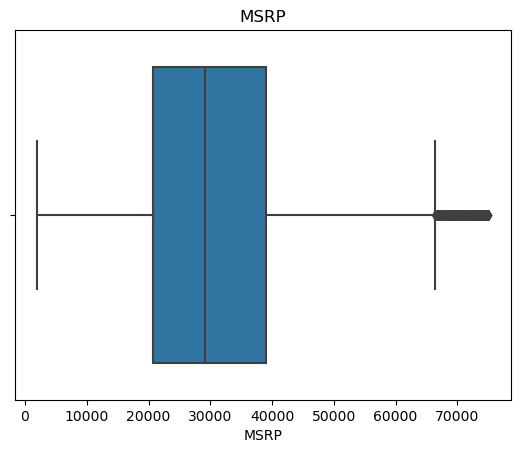

In [18]:
# Boxplot
for i in columns:
    data = df[i]
    sns.boxplot(x=data)
    plt.title(i)
    plt.show()
# Reason: To check that there is no outlier in 'MSRP' anymore and observe the distribution of other columns

### Run Chart

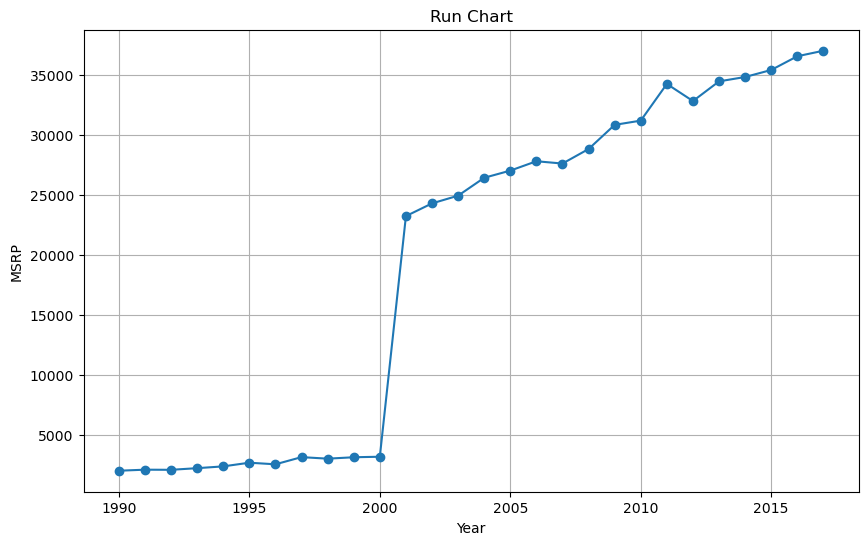

In [19]:
# Group the data by "Year" and calculate the mean of "MSRP"
grouped_data = df.groupby('Year')['MSRP'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data points
plt.plot(grouped_data['Year'], grouped_data['MSRP'], marker='o', linestyle='-')

# Customize the chart appearance
plt.title('Run Chart')
plt.xlabel('Year')
plt.ylabel('MSRP')

# Display the chart
plt.grid(True)
plt.show()
# Reason: To observe how the mean of 'MSRP' changed over year
# because the correlation coefficient between "Year" and "MSRP" is high

## (7) Train / Test Split<a class="anchor" id="split">

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

# Modeling: Linear Regression<a class="anchor" id="model"></a>
[Go to Top](#outline)<br>

### (1) Simple regression model # 1: Include only ONE explanatory variable<br>
    
> **Step 1:** Building linear regression model

> **Step 2:** Model information

> **Step 3:** Description


### (2) Simple regression model # 2: Include only ONE explanatory variable<br>

> **Step 1:** Building linear regression model

> **Step 2:** Model information

> **Step 3:** Description

### (3) Forward Selection

> **Step 1:** Operating forward selection
    
> **Step 2:** Visualize forward selection

### (4) Backward Selection
    
> **Step 1:** Operating backward selection
    
> **Step 2:** Visualize backward selection

## (1) Simple regression model # 1<a class="anchor" id="simple_1">

### Step 1: Building linear regression model

In [21]:
# Train and test a simple regression model: Include only ONE explanatory variable >> 'Exgine HP'

# Define the target and predictor variables
y = df['MSRP']
X = df['Engine HP']

X=np.array(X).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Step 2: Model information
> **SSE**

> **OLS Model**

> **Regression Metrix**

In [22]:
# Calcualte SSE
observaed_values = list(y_test)
predicted_values = list(y_predict)

residuals = [observed - predicted for observed, predicted in zip(observed_values, predicted_values)]

SSE = sum([residual ** 2 for residual in residuals])

print("SSE:", SSE)

NameError: name 'observed_values' is not defined

In [23]:
# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
reg = sm.OLS(y, X).fit()

# Display the model summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:20:32   Log-Likelihood:            -1.0967e+05
No. Observations:               10239   AIC:                         2.193e+05
Df Residuals:                   10237   BIC:                         2.194e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3407.3452    322.533    -10.564      0.000   -4039.572   -2775.118
x1           142.2779      1.314    108.239      0.000     139.701     144.855
==============================================================================
Omnibus:                      627.699   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.822
Skew:                          -0.459   Prob(JB):                    3.44e-250
Kurtosis:                       4.361   Cond. No.                         738.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Regression Metrix
res= stat()
res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(X)), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),1.085381e+04
1,Mean Squared Error (MSE),1.178051e+08
2,Mean Absolute Error (MAE),7.923086e+03
3,Mean Absolute Percentage Error (MAPE),1.172300e+00


### Step 3: Description
- What is the SSE (Sum of Squared Errors)?<br>
    > SSE of the first simple model is 367895600980.0956
    
- How would you describe the parameter estimate of the single features in your model?<br>
    > "Engine HP" feature can explain 53.4% of the variabilities, so I think this feature works well since it explains part of the model, but there are still many unexplainable variabilities.


## (2) Simple regression model # 2<a class="anchor" id="simple_2">

### Step 1: Building linear regression model

In [25]:
# Train and test a simple regression model: Include only ONE explanatory variable >> 'Year'

# Define the target and predictor variables
y = df['MSRP']
X = df['Year']

X=np.array(X).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Step 2: Model information
> **SSE**

> **OLS Model**

> **Regression Metrix**

In [26]:
# Calcualte SSE
observaed_values = list(y_test)
predicted_values = list(y_predict)

residuals = [observed - predicted for observed, predicted in zip(observed_values, predicted_values)]

SSE = sum([residual ** 2 for residual in residuals])

print("SSE:", SSE)

NameError: name 'observed_values' is not defined

In [27]:
# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
reg = sm.OLS(y, X).fit()

# Display the model summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     8293.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:20:38   Log-Likelihood:            -1.1054e+05
No. Observations:               10239   AIC:                         2.211e+05
Df Residuals:                   10237   BIC:                         2.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.855e+06   3.17e+04    -90.136      0.000   -2.92e+06   -2.79e+06
x1          1434.6633     15.754     91.068      0.000    1403.783    1465.544
==============================================================================
Omnibus:                      928.493   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.015
Skew:                           0.782   Prob(JB):                    5.35e-265
Kurtosis:                       3.640   Cond. No.                     5.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Regression Metrix
res= stat()
res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(X)), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),1.181365e+04
1,Mean Squared Error (MSE),1.395623e+08
2,Mean Absolute Error (MAE),9.165940e+03
3,Mean Absolute Percentage Error (MAPE),5.823000e-01


### Step 3: Description
- What is the SSE (Sum of Squared Errors)?<br>
    > SSE of the first simple model is 443987074393.5126
    
- How would you describe the parameter estimate of the single features in your model?<br>
    > "Year" feature can only explain 44.8% of the variabilities, which is worse than "Engine HP" and the standard error also much bigger than the model of "Engine HP".

## (3) Forward Selection<a class="anchor" id="forward">
- Loop to add one feature at a time
- Record the feature if it provides a lower RSS
    
> **Step 1:** Operating forward selection
    
> **Step 2:** Visualize forward selection
    
    

### Step 1: Operating forward selection

In [29]:
# Define the dependent and independent variables
y = df["MSRP"]
X = df[["Year", "Engine HP", "Engine Cylinders", "Transmission Type"]] 
# These features' absolute value of correlated coofficient are biger than 0.3

# Initialize variables for tracking the best models
best_score = 0
forward_features = []
forward_scores = []

# Forward Selection
while len(X.columns) > 0:
    remaining_features = list(set(X.columns) - set(forward_features))
    new_score, best_feature = float('inf'), None

    # Loop to add one feature at a time
    for feature in remaining_features:
        X_temp = sm.add_constant(X[forward_features + [feature]])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if it provides a lower RSS
        if score < new_score:
            new_score, best_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, add the best feature to the model
    if new_score < best_score or best_score == 0:
        forward_features.append(best_feature)
        forward_scores.append((new_score, new_adj_r2))
        best_score = new_score
    else:
        break

In [33]:
# Create a DataFrame to store the results of Forward Selection
forward_results_df = pd.DataFrame({
    'Step': list(range(1, len(forward_features) + 1)),
    'Added_Variable': forward_features,
    'RSS': [score[0] for score in forward_scores],
    'Adjusted_R2': [score[1] for score in forward_scores],
    'Included_Variables': [forward_features[:i+1] for i in range(len(forward_features))]
})

forward_results_df

,Step,Added_Variable,RSS,Adjusted_R2,Included_Variables
0,1,Engine HP,1.206206e+12,0.533635,[Engine HP]
1,2,Year,7.294130e+11,0.717954,"[Engine HP, Year]"
2,3,Transmission Type,7.133386e+11,0.724143,"[Engine HP, Year, Transmission Type]"
3,4,Engine Cylinders,7.019813e+11,0.728508,"[Engine HP, Year, Transmission Type, Engine Cy..."


### Step 2: Visualize forward selection

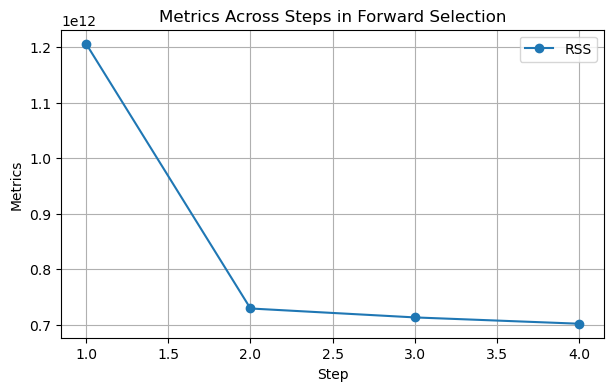

In [34]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(forward_results_df['Step'], forward_results_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()

## (4) Backward Selection<a class="anchor" id="backward">
- Loop to remove one feature at a time
- Record the feature if its removal results in a lower RSS
    
> **Step 1:** Operating backward selection
    
> **Step 2:** Visualize backward selection
    
    

### Step 1: Operating backward selection

In [35]:
# Re-initialize variables for tracking the best models
best_score = float('inf')
backward_features = list(X.columns)
backward_scores = []
backward_steps = []

# Re-run Backward Elimination with debugging information
while len(backward_features) > 0:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, remove the worst feature from the model
    if new_score < best_score:
        backward_features.remove(worst_feature)
        backward_scores.append((new_score, new_adj_r2))
        backward_steps.append((new_score, new_adj_r2, backward_features.copy()))
        best_score = new_score
    else:
        break

backward_steps

[(713338639278.3787,
  0.7241425479615687,
  ['Year', 'Engine HP', 'Transmission Type'])]

In [45]:
# Continue Backward Elimination until only 2 variables are left in the model
while len(backward_features) > 2:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # Remove the worst feature from the model
    backward_features.remove(worst_feature)
    backward_scores.append((new_score, new_adj_r2))
    backward_steps.append((new_score, new_adj_r2, backward_features.copy()))

# Create a DataFrame to store the results of continued Backward Elimination
backward_results_continued_df = pd.DataFrame({
    'Step': list(range(len(backward_features), 0, -1)),
    'Removed_Variable': backward_features[::-1],
    'RSS': [score[0] for score in backward_scores[::-1]],
    'Adjusted_R2': [score[1] for score in backward_scores[::-1]],
    'Included_Variables': [backward_features[:i] for i in range(len(backward_features), 0, -1)]
})

In [46]:
backward_results_continued_df

,Step,Removed_Variable,RSS,Adjusted_R2,Included_Variables
0,2,Engine HP,7.294130e+11,0.717954,"[Year, Engine HP]"
1,1,Year,7.133386e+11,0.724143,[Year]


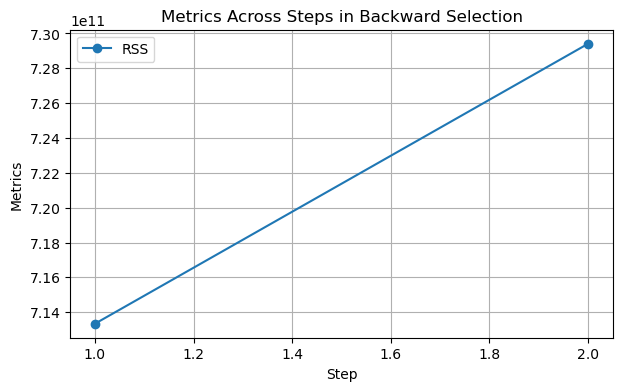

In [47]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_df['Step'], backward_results_continued_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()

## Final Report<a class="anchor" id="report">
Feel free to explore transformations of each feature, e.g. log transformations, etc.<br>
> What is the SSE (Sum of Squared Errors)?<br>

> What is the reason for selecting the predictors?<br>

### What is the SSE (Sum of Squared Errors)?

In [48]:
# Define the target and predictor variables
y = df['MSRP']
X = df[["Year", "Engine HP", "Engine Cylinders", "Transmission Type"]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [50]:
# Calcualte SSE
observed_values = list(y_test)
predicted_values = list(y_predict)

residuals = [observed - predicted for observed, predicted in zip(observed_values, predicted_values)]

SSE = sum([residual ** 2 for residual in residuals])

print("SSE:", SSE)

SSE: 221028931591.76712


### What is the reason for selecting the predictors?
- These features' absolute value of correlated coofficient are biger than 0.3

# Conclusion<a class="anchor" id="deploy"></a>
[Go to Top](#outline)<br>


### Are you satisfied with your final model’s performance?  Why or why not?<a class="anchor" id="Q1"><br>
- I am satisfied with the final model, because the R2 score increases to 0.728508, which means that the model can explain almost 73% of the variabilities and that it is better than the model in the above part.

### What do you propose for next steps?<a class="anchor" id="Q2"><br>
- I will collect some new data and put them into the model and observe the final prediction of MSRP.

### What would you do differently if you could?<a class="anchor" id="Q3"><br>
- I would try different set of the features in the final model because it may be possible that the correlated coefficient between X and y is small X but still influence y a lot.

### Based on your findings – what would you want to communicate to business leadership in this industry?<a class="anchor" id="Q4">  <br>
- "Year", "Engine HP", "Engine Cylinders", "Transmission Type" influence the MSRP prediction as important features.<br> 
    As a result, I suggest that the company can refer these four elements as important indices to distinguish different  classes of cars.<br>
    It may not only help the R&D department to develope different classes of car and also help the marketing department on pricing.<br>
    Finally, it can even predict other companies' MSRP of new products, which may help you to compete with others by modifying price of your products.